![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [4]:
df.shape

(541462, 3)

<AxesSubplot:>

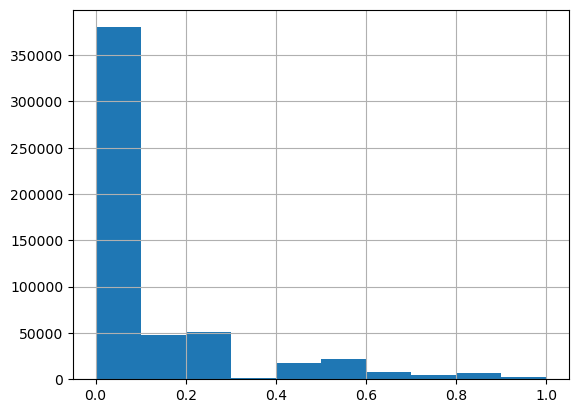

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Celda 1

vect_C = CountVectorizer(lowercase=False)
X_dtm_C = vect_C.fit_transform(X_train)
X_test1 = vect_C.transform(X_test)

regXGBoost = XGBRegressor()
regXGBoost.fit(X_dtm_C, y_train)
y_pred_regXGBoost = regXGBoost.predict(X_test1)

mse_regXGBoost = np.sqrt(mean_squared_error(y_test, y_pred_regXGBoost))
mae_regXGBoost = mean_absolute_error(y_test, y_pred_regXGBoost)

print("RMSE el modelo XGBoost sin calibrar", mse_regXGBoost)
print("MAE del modelo XGBoost sin calibrar", mae_regXGBoost)

RMSE el modelo XGBoost sin calibrar 0.14741022130681447
MAE del modelo XGBoost sin calibrar 0.10485978166273424


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [19]:
# Celda 2

vect_2 = CountVectorizer(lowercase=False, ngram_range=(3, 3))
X_dtm_2 = vect_2.fit_transform(X_train)
X_test2 = vect_2.transform(X_test)

rf = XGBRegressor()
rf.fit(X_dtm_2, y_train)
y_pred_rf = rf.predict(X_test2)

mse_XGB = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_XGB = mean_absolute_error(y_test, y_pred_rf)

print("RMSE el modelo XGBoost sin calibrar", mse_XGB)
print("MAE del modelo XGBoost sin calibrar", mae_XGB)

RMSE el modelo XGBoost sin calibrar 0.19216090994576152
MAE del modelo XGBoost sin calibrar 0.14079352601887393


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#### TfidfVectorizer
El TfidfVectorizer, es la abreviatura de "Term Frequency-Inverse Document Frequency Vectorizer", es una técnica de tokenización utilizada en el procesamiento de lenguaje natural (NLP). Esta técnica se centra en asignar pesos a cada término (token) en un documento según su importancia relativa en el corpus de documentos.

Funcionamiento:

* Frecuencia de término (TF - Term Frequency): Mide la frecuencia con la que aparece un término en un documento específico. Se calcula dividiendo el número de veces que aparece un término en un documento por el número total de términos en ese documento.
* Frecuencia inversa de documento (IDF - Inverse Document Frequency): es una fórmula que contabiliza el número de veces que se usa una palabra X en un conjunto de documentos (generalmente una base de datos) y, además, calcula su relevancia dentro de este conjunto.
* TF-IDF: Es un cálculo estadístico para medir qué términos son más relevantes para un documento, analizando la frecuencia con que aparecen en una página, en comparación con su frecuencia en un conjunto más grande de páginas.

Ventajas:

* Teniendo en cuenta la importancia relativa: TF-IDF considera la importancia relativa de los términos en conjunto general, lo que lo hace más adecuado para la representación de documentos donde algunos términos son más relevantes que otros.
* Reduce el impacto de términos comunes: Los términos comunes que aparecen en muchos documentos tienden a tener un peso más bajo en TF-IDF en comparación con CountVectorizer, lo que puede ayudar a reducir el ruido en la representación de los documentos.

Desventajas:

* Requiere mayor poder computacional: El cálculo de IDF implica procesar todos los documentos para determinar la importancia de cada término, lo que puede ser computacionalmente costoso para grandes conjuntos de datos.
* Menos interpretable: Aunque TF-IDF puede mejorar la representación de documentos en términos de relevancia de términos, la interpretación de los pesos resultantes puede ser más complicada que con CountVectorizer, donde simplemente se cuentan las ocurrencias de términos.
En resumen, TfidfVectorizer es útil cuando se busca una representación más refinada de los documentos, especialmente en casos donde la frecuencia de términos comunes puede no ser relevante. Sin embargo, puede requerir más recursos computacionales y puede ser menos intuitivo de interpretar en comparación con CountVectorizer.


https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

https://pypi.org/project/tfIdfInheritVectorizer/


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [18]:

vect_Tfidf = TfidfVectorizer(lowercase=False)
X_train_dtm_Tfidf = vect_Tfidf.fit_transform(X_train)
X_test_dtm_Tfidf = vect_Tfidf.transform(X_test)

regXGBoost_Tfidf = XGBRegressor()
regXGBoost_Tfidf.fit(X_train_dtm_Tfidf, y_train)

# Predicción sobre el set de test
y_pred_regXGBoost_Tfidf = regXGBoost_Tfidf.predict(X_test_dtm_Tfidf)

# Cálculo del error cuadrático medio (MSE)
mse_regXGBoost_Tfidf = np.sqrt(mean_squared_error(y_test, y_pred_regXGBoost_Tfidf))
mae_regXGBoost_Tfidf = mean_absolute_error(y_test, y_pred_regXGBoost_Tfidf)

print("RMSE del modelo XGBoost con TfidfVectorizer:", mse_regXGBoost_Tfidf)
print("MAE del modelo XGBoost sin calibrar", mae_regXGBoost_Tfidf)

RMSE del modelo XGBoost con TfidfVectorizer: 0.146398601448339
MAE del modelo XGBoost sin calibrar 0.1044315848930397


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

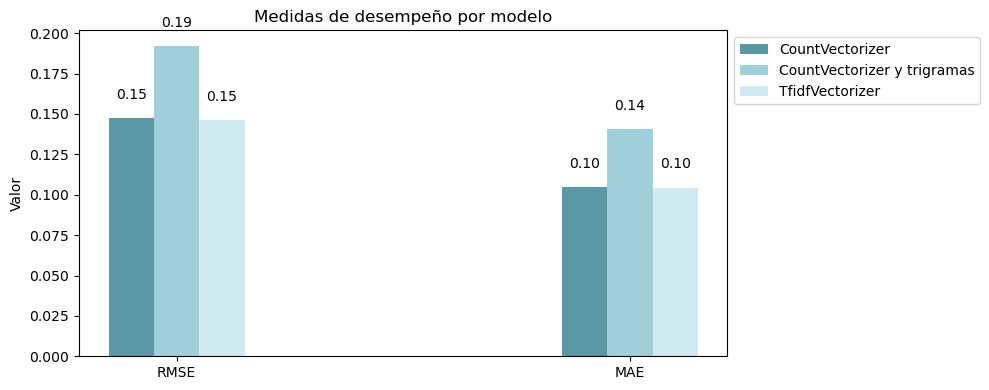

In [25]:
# Comparar las evaluaciones de poder predictivo de los diferentes modelos
medidas = [ 'RMSE', 'MAE']
modelos = {
    'CountVectorizer':[mse_regXGBoost, mae_regXGBoost],
    'CountVectorizer y trigramas':[mse_XGB, mae_XGB],
    'TfidfVectorizer':[mse_regXGBoost_Tfidf, mae_regXGBoost_Tfidf],
}

# Formato de colores para las barras
colores_modelos = ['#5B98A6', '#A0CED9', '#D0ECF2']

# Configuración de las dimensiones de figura
fig, ax = plt.subplots(figsize=(10, 4))
bar_width = 0.1
index = np.arange(len(medidas))

# Graficamos las barras con el valor obtenido en cada modelo para las medidas, redondeado a 2 cifras decimales las etiquetas
for i, (nombre_modelo, valores) in enumerate(modelos.items()):
    etiquetas = [f'{round(valor, 2):.2f}' for valor in valores]  # Redondear valores a 2 decimales y convertir a cadena
    ax.bar(index + i * bar_width, valores, bar_width, label=nombre_modelo, color=colores_modelos[i % len(colores_modelos)])
    for j, etiqueta in enumerate(etiquetas):
        ax.text(index[j] + i * bar_width, valores[j] + 0.01, etiqueta, ha='center', va='bottom')

# Ajustes de la figura
ax.set_xlabel('')
ax.set_ylabel('Valor')
ax.set_title('Medidas de desempeño por modelo')
ax.set_xticks(index + (len(modelos) - 1) * bar_width / 2)
ax.set_xticklabels(medidas)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Conclusiones

* CountVectorizer y TfidfVectorizer muestran resultados similares tanto en RMSE como en MAE, lo que indica que ambos enfoques de vectorización de texto tienen un rendimiento comparable en la predicción de la probabilidad de toxicidad en los comentarios.

* La inclusión de trigramas en el CountVectorizer parece aumentar el error tanto en RMSE como en MAE en comparación con el CountVectorizer sin trigramas. Esto sugiere que la adición de trigramas no proporciona una mejora significativa en la capacidad predictiva del modelo.

* El hecho de que tanto CountVectorizer como TfidfVectorizer tengan resultados similares sugiere que, para este conjunto de datos y este modelo en particular (XGBoost), el tipo de vectorización de texto utilizado puede no tener un impacto significativo en el rendimiento del modelo.

* Los valores de RMSE y MAE son relativamente bajos en todos los casos, lo que indica que el modelo de regresión (XGBoost) tiene una buena capacidad para predecir la probabilidad de toxicidad en los comentarios.